In [110]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
print(tf.__version__)

2.6.0


In [111]:
audio_data = np.load("audio_data.npy")
valence_labels = (np.load("valence_labels.npy")-1)/8
x_train, x_test, valence_y_train, valence_y_test = train_test_split(
    audio_data, valence_labels, test_size=0.4, random_state=0)

In [112]:
def build_model():
  model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu, 
                       input_shape=(x_train.shape[1],)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1,activation=tf.nn.sigmoid)
  ])
  optimizer =tf.optimizers.RMSprop(0.001)
  #optimizer = tf.train.RMSPropOptimizer(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
  return model

model = build_model()

In [113]:
# Display training progress by printing a single dot for each completed epoch.
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 500

# Store training stats
history = model.fit(x_train, valence_y_train, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

In [114]:
import matplotlib.pyplot as plt


def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [Valence]')
  plt.plot(history.epoch, np.array(history.history['mae']), 
           label='Train Loss')
  plt.plot(history.epoch, np.array(history.history['val_mae']),
           label = 'Val loss')
  plt.legend()
  plt.ylim([0,1])

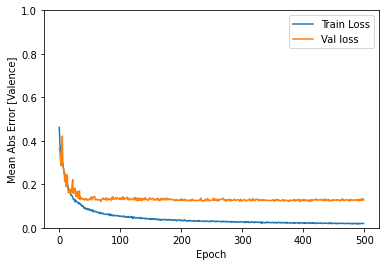

In [115]:
plot_history(history)


....................................................................................................

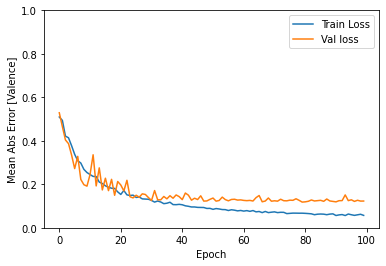

In [116]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement.
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

history = model.fit(x_train, valence_y_train, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[early_stop, PrintDot()])

plot_history(history)

In [117]:
[loss, mae] = model.evaluate(x_test, valence_y_test, verbose=0)

print("Testing set Mean Abs Error:{:7.2f}".format(mae))

Testing set Mean Abs Error:   0.12


In [118]:
test_predictions = model.predict(x_test).flatten()

print(len(test_predictions))
print(len(valence_y_test))

721
721


In [119]:
less_than_one=0
less_than_two=0
less_than_three=0
not_manageable=0

for i in range(len(valence_y_test)):
    diff = abs(test_predictions[i] - valence_y_test[i])
    if(diff < 1):
        less_than_one = less_than_one + 1
    elif(diff < 2):
        less_than_two = less_than_two + 1
    elif(diff < 3):
        less_than_three = less_than_three + 1
    else:
        not_manageable = not_manageable + 1
        print("test[{}] - values different by {:.1f}".format(i,diff))
    print("test[{0:}] - expected: {1:.1f}, prediction: {2:.1f}".format(i,test_predictions[i],valence_y_test[i]))
print("Summary of Differences:\nLess than one: {}\nLess than two: {}\nLess than three: {}\nUnmanageable: {}".format(less_than_one,less_than_two,less_than_three,not_manageable))


# print("test[436] - expected: {0:.1f}, prediction: {1:.1f}".format(test_predictions[436],valence_y_test[436]))

test[0] - expected: 0.6, prediction: 0.4
test[1] - expected: 0.5, prediction: 0.4
test[2] - expected: 0.6, prediction: 0.5
test[3] - expected: 0.5, prediction: 0.6
test[4] - expected: 0.7, prediction: 0.5
test[5] - expected: 0.5, prediction: 0.4
test[6] - expected: 0.5, prediction: 0.3
test[7] - expected: 0.3, prediction: 0.3
test[8] - expected: 0.6, prediction: 0.6
test[9] - expected: 0.5, prediction: 0.7
test[10] - expected: 0.4, prediction: 0.4
test[11] - expected: 0.4, prediction: 0.3
test[12] - expected: 0.1, prediction: 0.4
test[13] - expected: 0.5, prediction: 0.4
test[14] - expected: 0.5, prediction: 0.5
test[15] - expected: 0.4, prediction: 0.4
test[16] - expected: 0.6, prediction: 0.8
test[17] - expected: 0.5, prediction: 0.6
test[18] - expected: 0.6, prediction: 0.8
test[19] - expected: 0.5, prediction: 0.6
test[20] - expected: 0.4, prediction: 0.4
test[21] - expected: 0.5, prediction: 0.4
test[22] - expected: 0.4, prediction: 0.5
test[23] - expected: 0.5, prediction: 0.6
te

In [120]:
print("Test Samples Accounted for: {}/{}".format(less_than_one+less_than_two+less_than_three+not_manageable,len(valence_y_test)))

Test Samples Accounted for: 721/721


In [121]:
model.save('valence_model.h5')

In [31]:
copy=keras.models.load_model('arousal_model.h5')

In [50]:
#copy.predict(x_test)
print(x_test[0].max())
copy.predict(x_test[0:1])


0.39322975291893947


array([[0.5382393]], dtype=float32)

AttributeError: 'list' object has no attribute 'min'